In [50]:
!pip install yfinance
!pip install plotly
!pip install beautifulsoup4
!pip install lxml

In [54]:
import yfinance as yf
import pandas as pd
import plotly.graph_objs as go
import requests
from bs4 import BeautifulSoup

<h1> Tesla Data </h1>

In [55]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history(period="max")
tesla_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h1> Web Scraping Tesla Revenue</h1>

In [59]:
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Request the page
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# Find all tables in the page
tables = soup.find_all("table")

# Look for the Tesla Revenue table
for table in tables:
    if "Tesla Quarterly Revenue" in table.text:
        tesla_table_html = str(table)
        break

# Convert HTML table to DataFrame
tesla_revenue = pd.read_html(tesla_table_html)[0]

# Clean up the data
tesla_revenue.columns = ["Date", "Revenue"]
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != "$-"]
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
tesla_revenue["Revenue"] = pd.to_numeric(tesla_revenue["Revenue"], errors="coerce")
tesla_revenue.dropna(inplace=True)

# Display last 5 rows
tesla_revenue.tail()

C:\Users\TuanH\AppData\Local\Temp\ipykernel_35248\2207325025.py:20: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tesla_revenue = pd.read_html(tesla_table_html)[0]


,Date,Revenue
58,2010-09-30,31.0
59,2010-06-30,28.0
60,2010-03-31,21.0
62,2009-09-30,46.0
63,2009-06-30,27.0


<h1>Gamestop Data</h1>

In [61]:
gme = yf.Ticker("GME")
gme_data = gme.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683251,1.687459,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


<h1> Web Scraping Gamestop Revenue</h1>

In [68]:
headers = {
    "User-Agent": "Mozilla/5.0"
}

url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

tables = soup.find_all("table")

for table in tables:
    if "GameStop Quarterly Revenue" in table.text:
        gme_table_html = str(table)
        break

gme_revenue = pd.read_html(gme_table_html)[0]

gme_revenue.columns = ["Date", "Revenue"]
gme_revenue = gme_revenue[gme_revenue["Revenue"] != "$-"]
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace("$", "").str.replace(",", "")
gme_revenue["Revenue"] = pd.to_numeric(gme_revenue["Revenue"], errors="coerce")
gme_revenue.dropna(inplace=True)

gme_revenue.tail()

C:\Users\TuanH\AppData\Local\Temp\ipykernel_35248\2392481203.py:16: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  gme_revenue = pd.read_html(gme_table_html)[0]


,Date,Revenue
60,2010-01-31,3524
61,2009-10-31,1835
62,2009-07-31,1739
63,2009-04-30,1981
64,2009-01-31,3492


<h1> Tesla Stock 
Graph</h1>

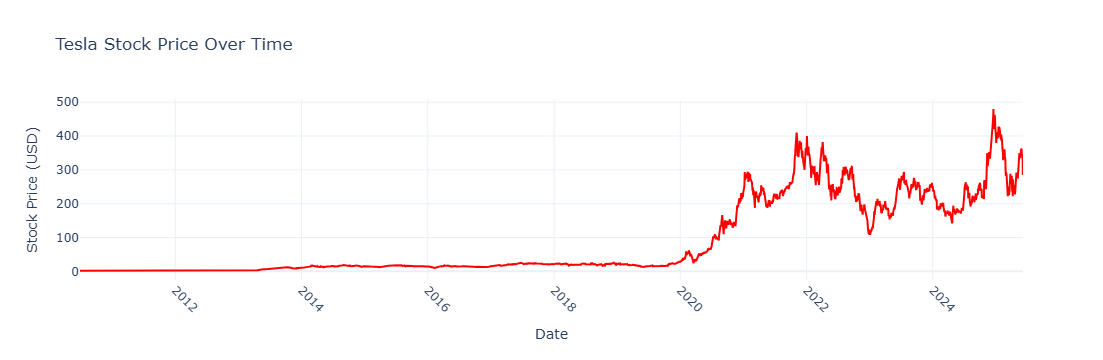

In [70]:
def make_graph(stock_data, stock_name):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        mode='lines',
        name=stock_name,
        line=dict(color='red')
    ))

    fig.update_layout(
        title=f"{stock_name} Stock Price Over Time",
        xaxis_title="Date",
        yaxis_title="Stock Price (USD)",
        xaxis=dict(tickangle=45),
        template='plotly_white'
    )

    fig.show()
tesla_data.reset_index(inplace=True)
make_graph(tesla_data, "Tesla")

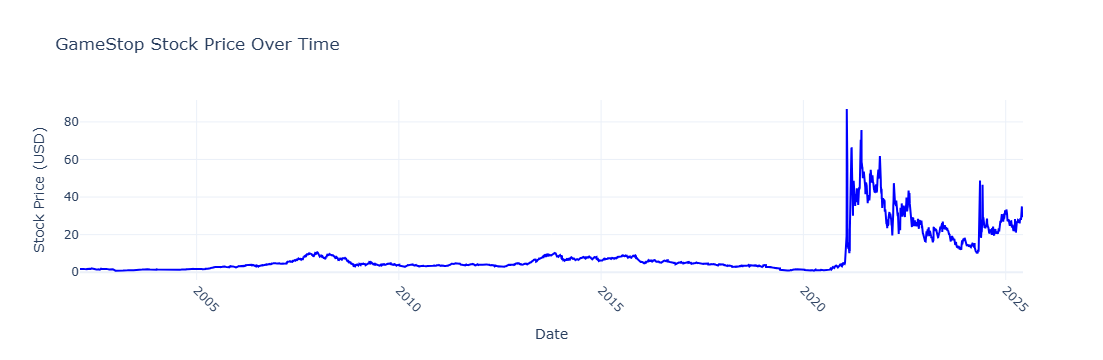

In [71]:
def make_graph(stock_data, stock_name):
    fig = go.Figure()

    fig.add_trace(go.Scatter(
        x=stock_data['Date'],
        y=stock_data['Close'],
        mode='lines',
        name=stock_name,
        line=dict(color='blue')
    ))

    fig.update_layout(
        title=f"{stock_name} Stock Price Over Time",
        xaxis_title="Date",
        yaxis_title="Stock Price (USD)",
        xaxis=dict(tickangle=45),
        template='plotly_white'
    )

    fig.show()
gme_data.reset_index(inplace=True)
make_graph(gme_data, "GameStop")